<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/Tarea1_Semana7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 1 Semana 7, Alumno Valentin Gracia

In [402]:
#librerisa Clasicas
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
import missingno as mssno

#Widgets
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider
import ipywidgets as widgets

#other
from termcolor import colored
from google.colab import output

import warnings
warnings.filterwarnings('ignore')

In [403]:
headers=["wineType","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins",
"Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
wine_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/Semana7/wine.data",names=headers)

In [404]:
wine_df.head(3)

,wineType,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [405]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wineType                      178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

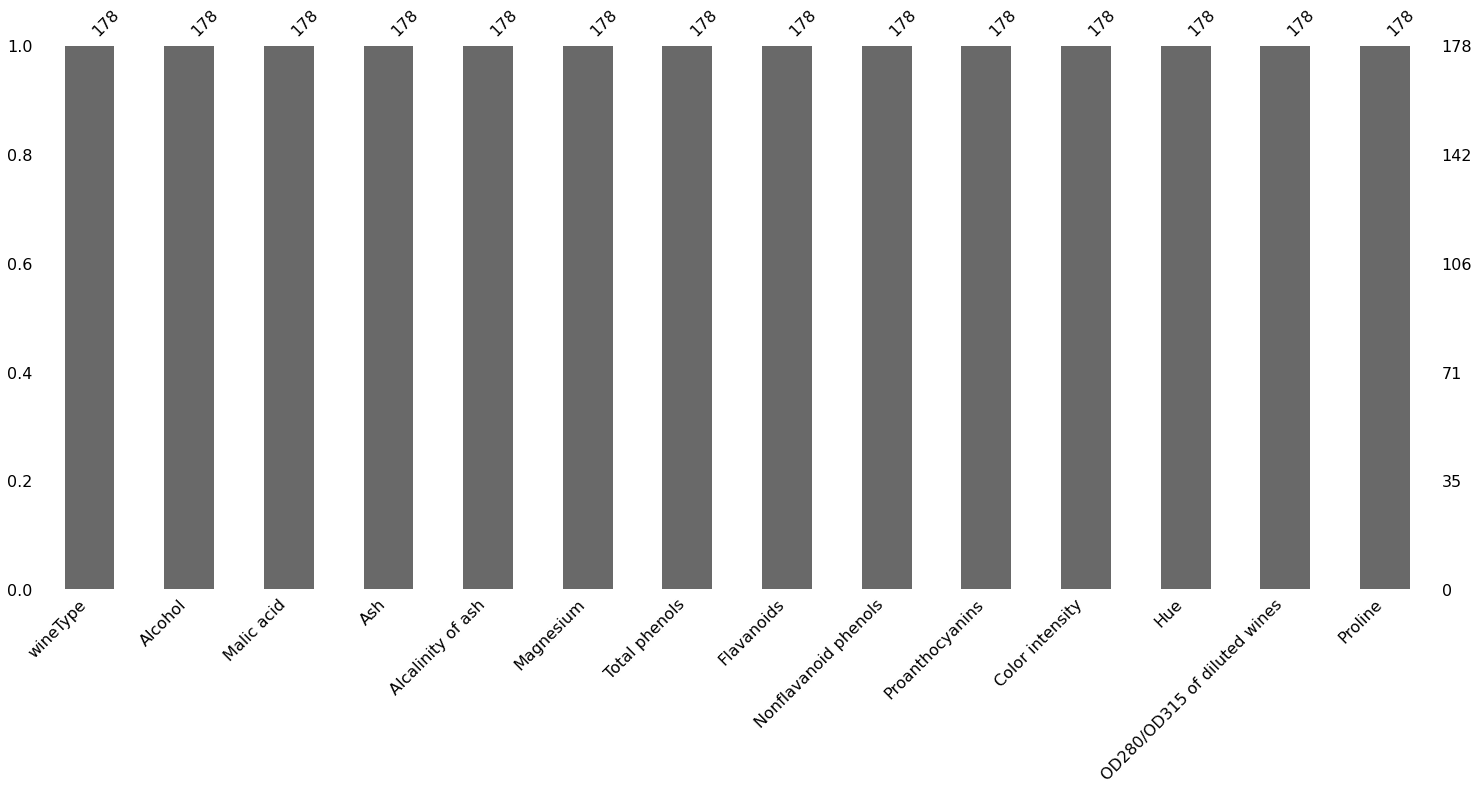

In [406]:
mssno.bar(wine_df);




In [407]:
from google.colab import widgets

#estoy trabajando esta funcion.
def f(varCol=0):
  df=wine_df
  output.clear()
  f=df.iloc[:,[varCol]];
  f=f.value_counts()
  f=pd.DataFrame(f)
  #print(f"csm {df.iloc[:,[x]].columns}")
  #print("Variable ", colored(f"*{df.iloc[:,[x]].column}*",'red'))
  #f.index.name =df.iloc[:,[x]].columns
  f.columns = ['count']

  print("Variable ", colored(f"*{varCol}*  dtype:{df.dtypes[varCol]}",'red'))
  print("-----")
  print(f"{len(f.index)} Categorias")
  print(f"{df.shape[0]-f.values.sum()} perdidos de  {df.shape[0]}")
  if len(f.index)== df.shape[0]:
    print("UNICO, se podria usar de indice")
 
 
  return f;
  
interact(f, varCol=(0,len(wine_df.columns)-1))

interactive(children=(IntSlider(value=0, description='varCol', max=13), Output()), _dom_classes=('widget-inter…

<function __main__.f>

In [408]:
X=wine_df.drop(columns=["wineType"])
y=wine_df["wineType"]

In [409]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=1)

In [410]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [411]:
logRegOVR=LogisticRegression().fit(X_train,y_train)
ovo=OneVsOneClassifier(SVC()).fit(X_train, y_train)

print(f"logRegovr: {logRegOVR}")
print(f"ovo: {ovo}")      
#ovr.fit(X_train,y_train)

logRegovr: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
ovo: OneVsOneClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   n_jobs=None)


In [412]:
#R2 train
print(f"logRegOVR: {logRegOVR.score(X_train,y_train)}")
print(f"ovo: {ovr.score(X_train,y_train)}")


logRegOVR: 1.0
ovo: 1.0


In [413]:
#r2 test
print(f"logRegOVR: {logRegOVR.score(X_test,y_test)}")
print(f"ovo: {ovo.score(X_test,y_test)}")

logRegOVR: 1.0
ovo: 0.9777777777777777


# ahora vamos con la optimizaciones

In [414]:
param_grid_logRegOVR = [{'penalty': ["none","l1","l2",'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
   'C': [100, 50, 20, 10, 5, 1,0.5,0.3,0.2,0.1]}]

bestRegLogOVR = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid_logRegOVR, scoring = 'accuracy', cv=10) 
bestRegLogOVR = bestRegLogOVR.fit(X_train,y_train)



In [415]:
print("Mejor score (error minimo cuadrado negativo): ", bestRegLogOVR.best_score_)
print("Mejores hiperparámetros: ", bestRegLogOVR.best_params_)
print("Mejor modelo: ", bestRegLogOVR.best_estimator_)

Mejor score (error minimo cuadrado negativo):  0.9923076923076923
Mejores hiperparámetros:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor modelo:  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [416]:
ovo.get_params().keys()

dict_keys(['estimator__C', 'estimator__break_ties', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

In [417]:
param_grid_OVO = [{'estimator__C': [1,0.7,0.4,0.1]}]

bestOVO = GridSearchCV(estimator = OneVsOneClassifier(SVC()), param_grid = param_grid_OVO, scoring = 'accuracy', cv=10) 

bestOVO = bestOVO.fit(X_train,y_train)



In [418]:
print("Mejor score (error minimo cuadrado negativo): ", bestOVO.best_score_)
print("Mejores hiperparámetros: ", bestOVO.best_params_)
print("Mejor modelo: ", bestOVO.best_estimator_)

Mejor score (error minimo cuadrado negativo):  0.976923076923077
Mejores hiperparámetros:  {'estimator__C': 1}
Mejor modelo:  OneVsOneClassifier(estimator=SVC(C=1, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   n_jobs=None)


In [419]:
#R2 Best train
print(f"Best logRegOVR: {bestRegLogOVR.score(X_train,y_train)}")
print(f"Best ovo: {bestOVO.score(X_train,y_train)}")


Best logRegOVR: 1.0
Best ovo: 1.0


In [420]:
#R2 Best test
print(f"Best logRegOVR: {bestRegLogOVR.score(X_test,y_test)}")
print(f"Best ovo: {bestOVO.score(X_test,y_test)}")

Best logRegOVR: 0.9777777777777777
Best ovo: 0.9777777777777777
